# 🏠 Zonaprop - Análisis Exploratorio de Datos (EDA)

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# Cargar dataset
df = pd.read_csv("../data/zonaprop_clean.csv")
df.head()


,titulo,caracteristicas,precio_numerico,precio_por_m2,categoria_precio,metros_cuadrados,categoria_tamano,ambientes,dormitorios,banos,cocheras,barrio,ciudad,descripcion
0,maipu 10,50 m² tot. 3 amb. 1 dorm. 5 baños,390000,7800.000000,Económico,50.0,Mediano,3,1,5.0,NaN,Centro,Córdoba,Venezia y Asociados - Gestión Inmobiliaria te ...
1,Parana 635,65 m² tot. 3 amb. 1 dorm. 1 baño,650000,10000.000000,Medio,65.0,Mediano,3,1,1.0,NaN,Nueva Córdoba,Córdoba,"Boden presenta. Ubicacion: Parana 635, entre s..."
2,Lima al 1600,45 m² tot. 2 amb. 1 dorm. 1 baño,450000,10000.000000,Económico,45.0,Pequeño,2,1,1.0,NaN,General Paz,Córdoba,Departamento en alquiler de un dormitorio en B...
3,Bv. Illia 362 - 1° A - 1 Dormitorio,45 m² tot. 2 amb. 1 dorm. 1 baño,600000,13333.333333,Medio,45.0,Pequeño,2,1,1.0,NaN,Nueva Córdoba,Córdoba,"Neta alquila Departamento en un 1° piso, el cu..."
4,SAN JERONIMO 351,73 m² tot. 4 amb. 2 dorm. 1 baño,520000,7123.287671,Medio,73.0,Mediano,4,2,1.0,NaN,Centro,Córdoba,Departamento en alquiler: san jeronimo 351 - c...


In [37]:
df.isnull().sum()


titulo                0
caracteristicas       0
precio_numerico       0
precio_por_m2         3
categoria_precio      0
metros_cuadrados      3
categoria_tamano      0
ambientes             0
dormitorios           0
banos                 7
cocheras            126
barrio                0
ciudad                0
descripcion           0
dtype: int64

In [38]:
df.dtypes


titulo               object
caracteristicas      object
precio_numerico       int64
precio_por_m2       float64
categoria_precio     object
metros_cuadrados    float64
categoria_tamano     object
ambientes             int64
dormitorios           int64
banos               float64
cocheras            float64
barrio               object
ciudad               object
descripcion          object
dtype: object

In [39]:
df.describe()


,precio_numerico,precio_por_m2,metros_cuadrados,ambientes,dormitorios,banos,cocheras
count,1.500000e+02,147.000000,147.000000,150.000000,150.000000,143.000000,24.000000
mean,5.773623e+05,16219.804983,126.496599,2.833333,1.380000,1.195804,1.125000
std,2.291093e+05,73485.765387,574.895600,1.101656,0.487013,0.507115,0.448427
min,1.100000e+03,0.350000,1.000000,2.000000,1.000000,1.000000,1.000000
25%,4.200000e+05,8333.333333,45.000000,2.000000,1.000000,1.000000,1.000000
50%,5.500000e+05,9800.000000,50.000000,2.000000,1.000000,1.000000,1.000000
75%,7.000000e+05,12111.111111,70.000000,3.000000,2.000000,1.000000,1.000000
max,1.500000e+06,900000.000000,5000.000000,8.000000,2.000000,5.000000,3.000000


## 📦 Parte 2: Distribuciones y detección de outliers

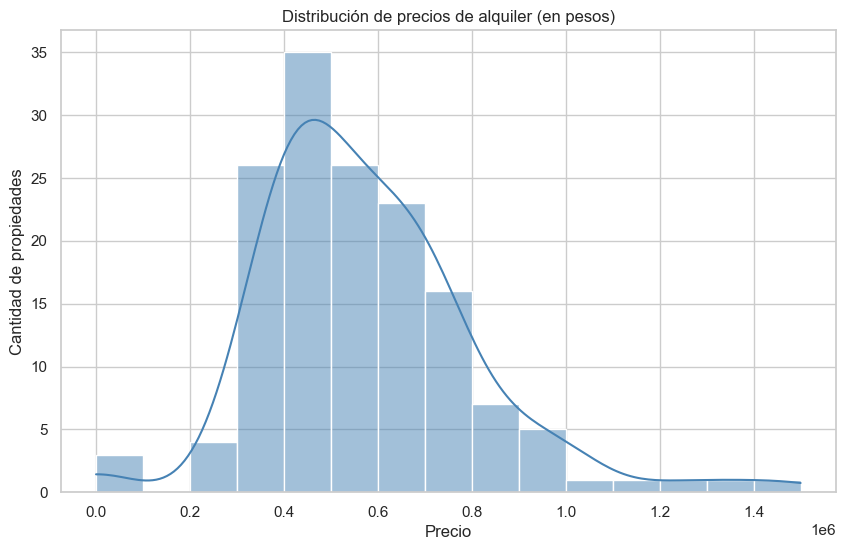

In [40]:
sns.histplot(df['precio_numerico'], bins=15, kde=True, color='steelblue')
plt.title("Distribución de precios de alquiler (en pesos)")
plt.xlabel("Precio")
plt.ylabel("Cantidad de propiedades")
plt.show()


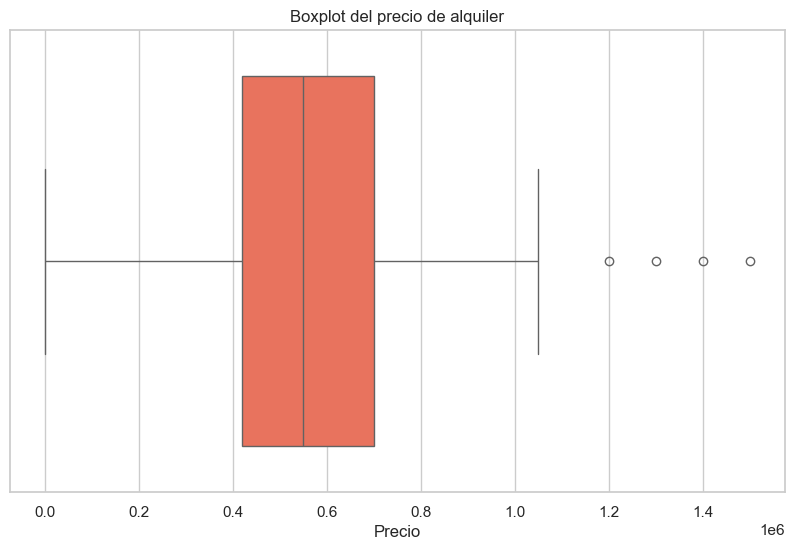

In [41]:
sns.boxplot(x=df['precio_numerico'], color='tomato')
plt.title("Boxplot del precio de alquiler")
plt.xlabel("Precio")
plt.show()


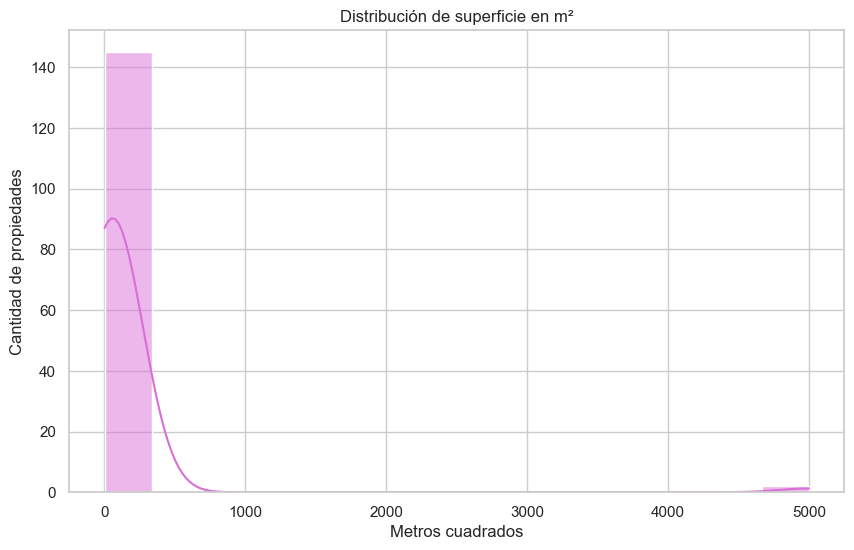

In [42]:
sns.histplot(df['metros_cuadrados'], bins=15, kde=True, color='orchid')
plt.title("Distribución de superficie en m²")
plt.xlabel("Metros cuadrados")
plt.ylabel("Cantidad de propiedades")
plt.show()


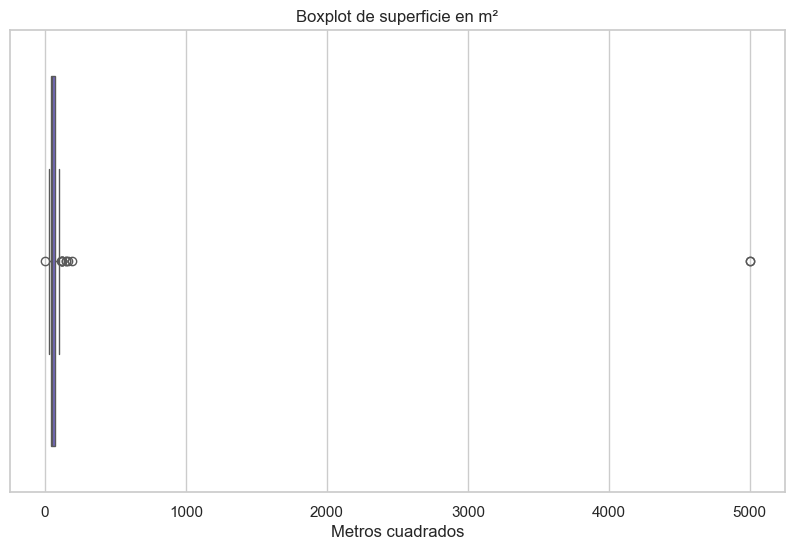

In [43]:
sns.boxplot(x=df['metros_cuadrados'], color='slateblue')
plt.title("Boxplot de superficie en m²")
plt.xlabel("Metros cuadrados")
plt.show()


## 📊 Parte 3: Agrupaciones por barrio y ambientes

C:\Users\Guido Lujan.Desarrollo-Lemp\AppData\Local\Temp\ipykernel_20364\2982218621.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=barrio_precio.values[:10], y=barrio_precio.index[:10], palette="viridis")


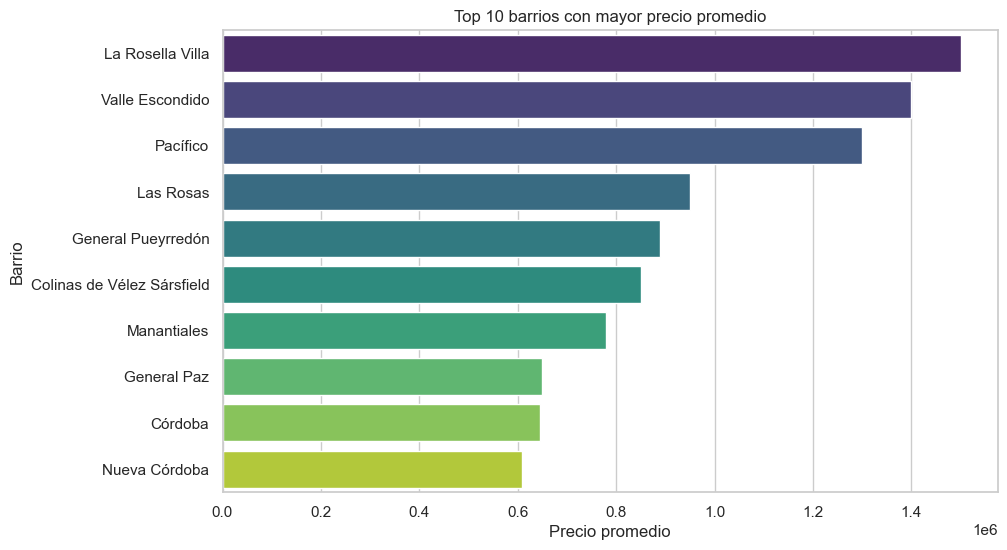

In [44]:
barrio_precio = df.groupby("barrio")["precio_numerico"].mean().sort_values(ascending=False)
sns.barplot(x=barrio_precio.values[:10], y=barrio_precio.index[:10], palette="viridis")
plt.title("Top 10 barrios con mayor precio promedio")
plt.xlabel("Precio promedio")
plt.ylabel("Barrio")
plt.show()


C:\Users\Guido Lujan.Desarrollo-Lemp\AppData\Local\Temp\ipykernel_20364\208153366.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=barrio_m2.values[:10], y=barrio_m2.index[:10], palette="mako")


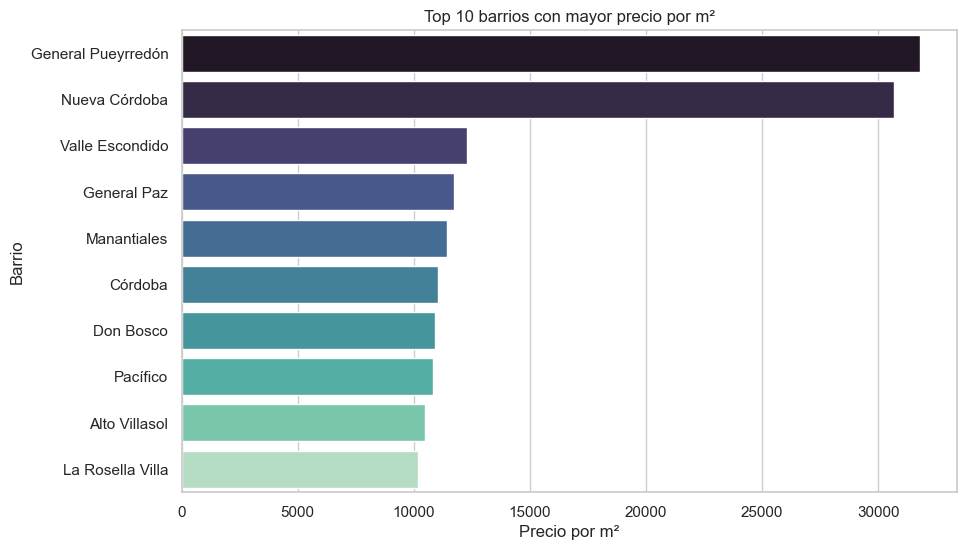

In [45]:
barrio_m2 = df.groupby("barrio")["precio_por_m2"].mean().sort_values(ascending=False)
sns.barplot(x=barrio_m2.values[:10], y=barrio_m2.index[:10], palette="mako")
plt.title("Top 10 barrios con mayor precio por m²")
plt.xlabel("Precio por m²")
plt.ylabel("Barrio")
plt.show()


C:\Users\Guido Lujan.Desarrollo-Lemp\AppData\Local\Temp\ipykernel_20364\1169031851.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ambientes_precio.index, y=ambientes_precio.values, palette="Blues_d")


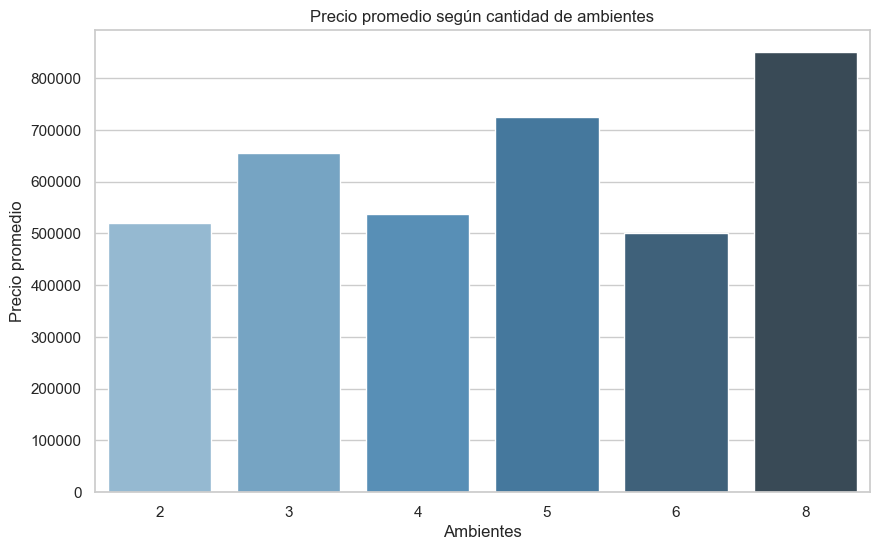

In [46]:
ambientes_precio = df.groupby("ambientes")["precio_numerico"].mean().sort_index()
sns.barplot(x=ambientes_precio.index, y=ambientes_precio.values, palette="Blues_d")
plt.title("Precio promedio según cantidad de ambientes")
plt.xlabel("Ambientes")
plt.ylabel("Precio promedio")
plt.show()


## 🔗 Parte 4: Correlaciones entre variables

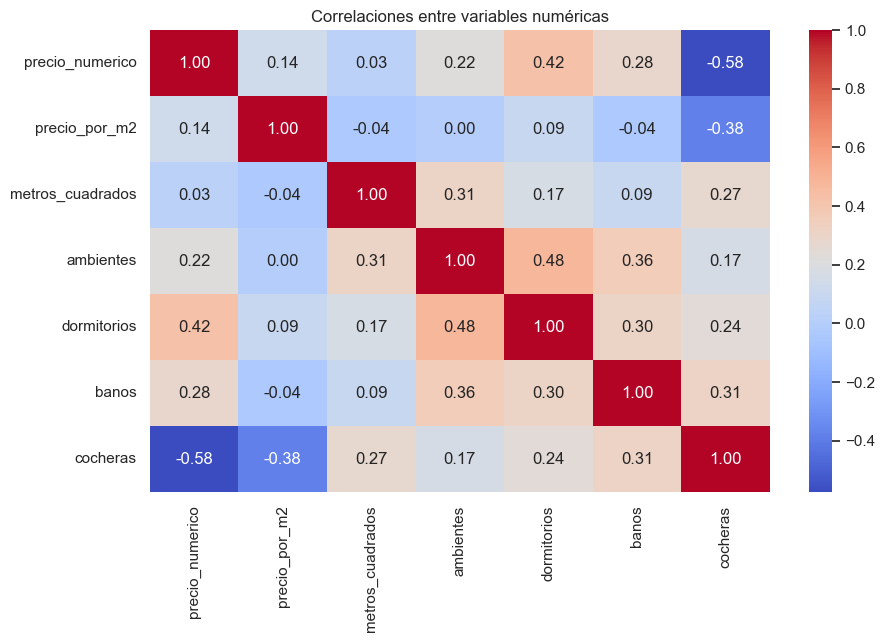

In [47]:
corr = df[["precio_numerico", "precio_por_m2", "metros_cuadrados", "ambientes", "dormitorios", "banos", "cocheras"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlaciones entre variables numéricas")
plt.show()


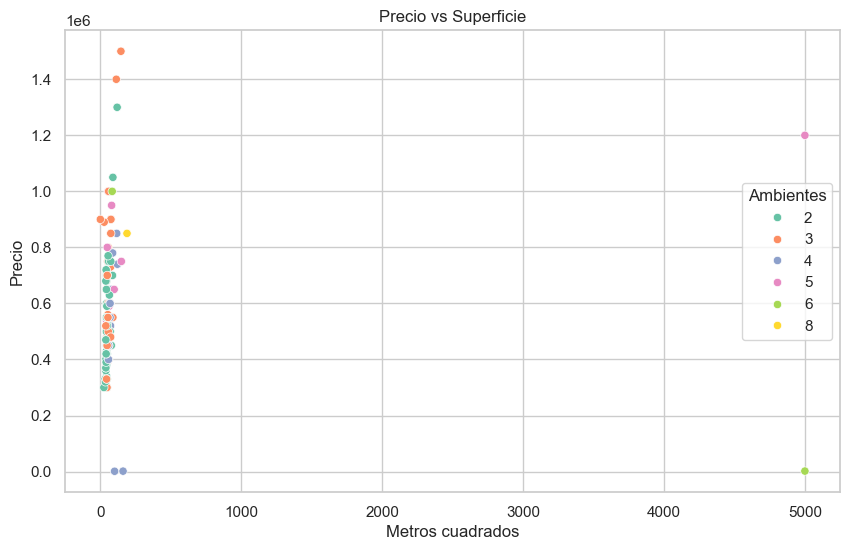

In [48]:
sns.scatterplot(x="metros_cuadrados", y="precio_numerico", data=df, hue="ambientes", palette="Set2")
plt.title("Precio vs Superficie")
plt.xlabel("Metros cuadrados")
plt.ylabel("Precio")
plt.legend(title="Ambientes")
plt.show()


## ✅ Parte 5: Conclusiones

### 📌 Conclusiones del EDA con datos actualizados

- 💰 **Precio promedio general**: ~$599.990  
- 📐 **Superficie promedio**: ~96.22 m²  
- 🛋️ **Ambientes promedio**: ~2.88  

---

### 🏙️ Barrios con mayor precio promedio:
1. **La Rosella Villa** – $1.500.000
2. **Valle Escondido** – $1.400.000
3. **Pacífico** – $1.300.000
4. **Jockey Club** – $900.000
5. **Las Rosas** – $866.667

---

### 💵 Precio promedio por categoría:
- **Premium**: $1.350.000
- **Alto**: $902.631
- **Medio**: $639.538
- **Económico**: $394.154

---

### 📊 Precio promedio por metro cuadrado:
- **$22.378 /m²**

---

### 📌 Barrios con más propiedades listadas:
- **Nueva Córdoba**: 43 propiedades
- **General Paz**: 27 propiedades
- **Centro**: 14 propiedades
- **Córdoba**: 8 propiedades
- **Alto Alberdi**: 7 propiedades

---

### 🧱 Distribución de tamaño de propiedades:
- **Pequeño**: 61 propiedades
- **Mediano**: 58 propiedades
- **Grande**: 15 propiedades
- **Muy grande**: 9 propiedades
